# 목표 : 어떤 속성이 제주 방문인구 수에 영향을 끼치는 지 분석하고  2019~2020년 방문인구수 예측하기.
# 설명 동영상 링크 => https://youtu.be/G2ZmZniMBnY

In [1]:
import pandas as pd
import numpy as np

#자료 출처 https://www.jejudatahub.net/data/view/data/753 제주 데이터허브
jeju = pd.read_csv('jeju_data.csv',encoding='euc-kr')

In [2]:
jeju.head()

일자   시도명 읍면동명        거주인구       근무인구        방문인구      총 유동인구  \
0  2018-01-01  서귀포시  남원읍  291408.897  18744.131  219588.857  529741.884   
1  2018-01-01  서귀포시  대륜동  267671.778  20177.907  212778.579  500628.264   
2  2018-01-01  서귀포시  대정읍  385419.306  16536.359  161422.712  563378.377   
3  2018-01-01  서귀포시  대천동  155036.925   9403.969  150882.409  315323.303   
4  2018-01-01  서귀포시  동홍동  372744.391  26351.698  160768.257  559864.346   

       교통량   평균 속도  평균 소요 시간  평균 기온  일강수량  평균 풍속     데이터기준일자  
0   76.200  53.000    40.571  2.350   0.0  3.325  2020-12-15  
1    0.000  39.185    33.630  4.900   0.0  1.900  2020-12-15  
2  394.789  54.632    42.579  6.633   0.0  6.367  2020-12-15  
3    0.000  41.583    14.375  5.100   0.0  2.300  2020-12-15  
4    0.000  39.667    30.476  4.900   0.0  1.900  2020-12-15

In [3]:
#데이터 확인

In [4]:
#글씨체 선택
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot:>

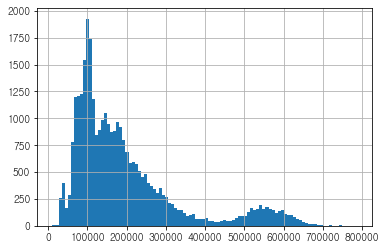

In [5]:
jeju['방문인구'].hist(bins=100)

# 본 데이터는 일자, 지역별로 세세히 데이터가 나눠저 있어 통일성을 위해 일자별로 데이터의 평균값을 구해 시도하였습니다.

In [6]:
jeju_mean=jeju.groupby(['일자'], as_index=False).mean()

<AxesSubplot:>

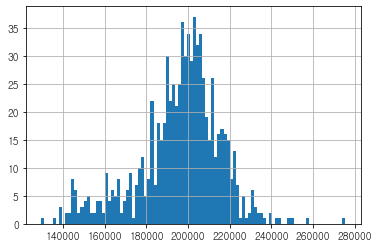

In [7]:
# 180000 ~ 220000 사이 데이터가 가장 많다.
jeju_mean['방문인구'].hist(bins=100)

In [8]:
import matplotlib.pyplot as plt

In [9]:
jeju_mean.head(-1)

일자           거주인구          근무인구           방문인구         총 유동인구  \
0    2018-01-01  317309.342098  22614.753707  198800.837073  538724.932927   
1    2018-01-02  316696.629488  37324.649829  182846.761927  536868.041341   
2    2018-01-03  315537.570146  37350.654659  183220.805780  536109.030707   
3    2018-01-04  304965.323488  36979.035098  189812.450537  531756.809049   
4    2018-01-05  312561.529732  35778.820512  184950.181756  533290.531878   
..          ...            ...           ...            ...            ...   
797  2020-04-25  344968.125425  23491.301075  182326.690400  550786.116825   
798  2020-04-26  343974.590175  20073.036100  170438.111975  534485.738275   
799  2020-04-27  336830.456275  30541.056950  164695.766500  532067.279725   
800  2020-04-28  334859.593525  30908.123525  167095.192925  532862.909975   
801  2020-04-29  331464.990975  30825.681950  174839.570300  537130.243300   

            교통량      평균 속도   평균 소요 시간      평균 기온      일강수량     평균 풍속  
0    289.730488  41.819561  34.339293   3.105512  0.000000  2.661805  
1    368.399268  40.727439  36.143439   4.321146  0.000000  2.128049  
2    372.731073  40.526927  36.202805   3.508317  0.000000  2.984585  
3    370.993512  40.265561  36.650073   2.739195  2.040683  2.270756  
4    372.141561  40.186854  36.662341   2.639220  3.528463  3.083561  
..          ...        ...        ...        ...       ...       ...  
797  358.247600  42.714600  36.810500  14.674425  0.000000  4.873875  
798  315.821225  43.312775  35.853450  11.697625  0.000000  2.327325  
799  384.062400  42.255300  37.553325  11.523175  0.000000  2.469575  
800  398.063775  42.023025  37.564050  11.731375  0.000000  2.528525  
801  413.015175  41.640900  37.710325  12.766275  0.000000  2.125200  

[802 rows x 11 columns]

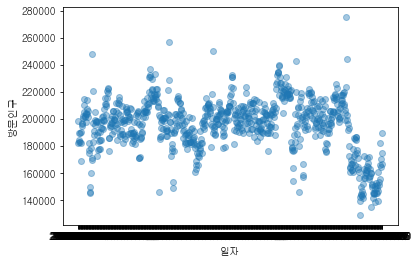

In [10]:
plt.scatter(jeju_mean['일자'],jeju_mean['방문인구'],alpha=0.4)
plt.xlabel('일자')
plt.ylabel('방문인구')
plt.show()

## 계절 별로 큰 의미성을 보이지 않는 것 같지만 최근으로 갈 때 방문 인구 수가 확 줄어드는걸 볼 수 있음.

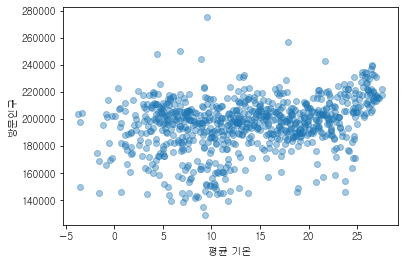

In [11]:
# 혹시 기온에 따라 분포도가 다를까 싶어 봤지만 대체적으로 고르 분포되어 있음.
plt.scatter(jeju_mean['평균 기온'],jeju_mean['방문인구'],alpha=0.4)
plt.xlabel('평균 기온')
plt.ylabel('방문인구')
plt.show()

# 최근으로 갈 수록 방문 인구 수가 줄어든 것으로 보아 코로나가 관련된 것이라고 생각. 코로나 일별 총 확진자 수를 대입해 보기로 함. 출처(https://coronaboard.kr/)

In [12]:
corona = pd.read_csv('kr_daily.csv',encoding='euc-kr')

In [13]:
# 제주 데이터와, 코로나 데이터를 일자별로 맞춰 데이터를 합침.
jeju_corona = pd.merge(jeju_mean,corona,how='outer',on='일자')
jeju_corona.head()

일자           거주인구          근무인구           방문인구         총 유동인구  \
0  2018-01-01  317309.342098  22614.753707  198800.837073  538724.932927   
1  2018-01-02  316696.629488  37324.649829  182846.761927  536868.041341   
2  2018-01-03  315537.570146  37350.654659  183220.805780  536109.030707   
3  2018-01-04  304965.323488  36979.035098  189812.450537  531756.809049   
4  2018-01-05  312561.529732  35778.820512  184950.181756  533290.531878   

          교통량      평균 속도   평균 소요 시간     평균 기온      일강수량     평균 풍속  confirmed  \
0  289.730488  41.819561  34.339293  3.105512  0.000000  2.661805          0   
1  368.399268  40.727439  36.143439  4.321146  0.000000  2.128049          0   
2  372.731073  40.526927  36.202805  3.508317  0.000000  2.984585          0   
3  370.993512  40.265561  36.650073  2.739195  2.040683  2.270756          0   
4  372.141561  40.186854  36.662341  2.639220  3.528463  3.083561          0   

   death  released  tested  negative  daily  
0      0         0       0         0      0  
1      0         0       0         0      0  
2      0         0       0         0      0  
3      0         0       0         0      0  
4      0         0       0         0      0

In [14]:
#https://tjansry354.tistory.com/12

## 0으로 표시된곳은 코로나 이전. 코로나 이전이 확실히 많을 것을 볼 수 있음.
## 확진자 발생 후 방문 인구가 확연히 줄어들다 시간에 따라 적응 후 제자리를 찾는게 보임

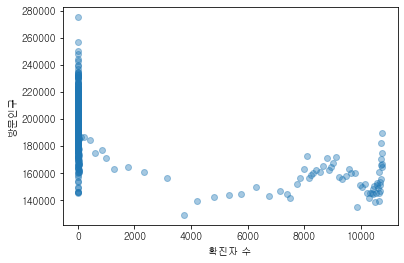

In [15]:
plt.scatter(jeju_corona['confirmed'],jeju_corona['방문인구'],alpha=0.4)
plt.xlabel('확진자 수')
plt.ylabel('방문인구')
plt.show()

## 완치자와 방문인구의 상관관계를 봤을 때 초기에는 큰 영향이 없지만 점 점 늘어나는 것이 보임.

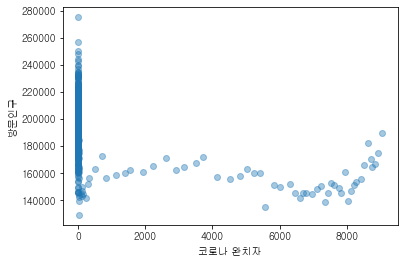

In [16]:
plt.scatter(jeju_corona['released'],jeju_corona['방문인구'],alpha=0.4)
plt.xlabel('코로나 완치자')
plt.ylabel('방문인구')
plt.show()

# 이 유의미한 데이터를 이용하여 제주 방문인구를 예측해 보는 모델을 만들어 보려고함.

In [17]:
jeju_corona.head()

일자           거주인구          근무인구           방문인구         총 유동인구  \
0  2018-01-01  317309.342098  22614.753707  198800.837073  538724.932927   
1  2018-01-02  316696.629488  37324.649829  182846.761927  536868.041341   
2  2018-01-03  315537.570146  37350.654659  183220.805780  536109.030707   
3  2018-01-04  304965.323488  36979.035098  189812.450537  531756.809049   
4  2018-01-05  312561.529732  35778.820512  184950.181756  533290.531878   

          교통량      평균 속도   평균 소요 시간     평균 기온      일강수량     평균 풍속  confirmed  \
0  289.730488  41.819561  34.339293  3.105512  0.000000  2.661805          0   
1  368.399268  40.727439  36.143439  4.321146  0.000000  2.128049          0   
2  372.731073  40.526927  36.202805  3.508317  0.000000  2.984585          0   
3  370.993512  40.265561  36.650073  2.739195  2.040683  2.270756          0   
4  372.141561  40.186854  36.662341  2.639220  3.528463  3.083561          0   

   death  released  tested  negative  daily  
0      0         0       0         0      0  
1      0         0       0         0      0  
2      0         0       0         0      0  
3      0         0       0         0      0  
4      0         0       0         0      0

In [18]:
# 데이터 전처리
# 총 유동인구는 거주인구, 근무인구, 방문인구의 합 이므로 제거, 근무인구 또한 제거
jeju_corona = jeju_corona.drop(['총 유동인구','근무인구',], axis=1)
# 일자, 교통량, 평균 속도, 평균 소요 시간은 크게 영향을 받지 않으므로 제거
jeju_corona = jeju_corona.drop(['일자','교통량', '평균 속도', '평균 소요 시간'], axis=1)


In [19]:
# Info를 보면 데이터의 수가 다른 것을 볼 수 있다. 이는 서로 다른 데이터를 합쳤을 때 나온 오류같다,
# 오류들을 제거해보자.
jeju_corona=jeju_corona.dropna(axis=0)

In [20]:
jeju_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   거주인구       803 non-null    float64
 1   방문인구       803 non-null    float64
 2   평균 기온      803 non-null    float64
 3   일강수량       803 non-null    float64
 4   평균 풍속      803 non-null    float64
 5   confirmed  803 non-null    int64  
 6   death      803 non-null    int64  
 7   released   803 non-null    int64  
 8   tested     803 non-null    int64  
 9   negative   803 non-null    int64  
 10  daily      803 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 75.3 KB


In [22]:
# 이 모델은 미지의 값을 예측해야하기 선형 회귀 모델로 코드를 작성하였습니다.

In [23]:
# 머신 러닝 수행
# 학습용, 테스트용 데이터로 분리
from sklearn.model_selection import train_test_split
y_target = jeju_corona['방문인구']
X_features = jeju_corona.drop('방문인구', axis = 1)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=11)

In [24]:
# 5주차 코드를 사용하여 두 가지 모델을 비교해보았습니다.
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 2-1. 학습 객체 생성
rf_reg = RandomForestRegressor()
lr_reg = LinearRegression()
# 2-2. 학습 데이터로 학습
rf_reg.fit(X_train, y_train)
lr_reg.fit(X_train, y_train)
print('RandomForestRegressor 모델 :',rf_reg.score(X_test, y_test))
print('LinearRegression 모델 :',lr_reg.score(X_test, y_test))

RandomForestRegressor 모델 : 0.5962794683615131
LinearRegression 모델 : 0.5345448866208387


In [25]:
# 하이퍼파라미터 튜닝 (GridSearchCV)
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [3, 5]
}

grid_rf = GridSearchCV(rf_reg, param_grid, cv = 5, 
                      scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [3, 5], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [27]:
grid_rf.best_params_

{'max_features': 3, 'n_estimators': 200}

In [28]:
grid_rf.score(X_test, y_test)

-152939848.5158996

In [29]:
from pandas import Series

In [30]:
imp = Series(grid_rf.best_estimator_.feature_importances_, index = X_test.columns)

<AxesSubplot:>

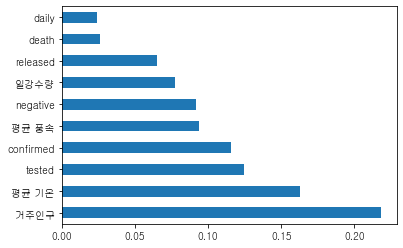

In [31]:
imp.sort_values(ascending = False).plot(kind = 'barh')
# 거주인구, 평균 기온, 검사자 수, 미감염자, 총 확진자 수가 가장 영향을 많이 받는것으로 보여짐

In [32]:
# 예측한 모델을 시각화 해보자
# 하이퍼파라미터 튜닝 모델을 가지고 시각화 해보자
model = grid_rf.fit(X_train, y_train)
x_new=X_test
# 예측된 방문객 수이다.
y_new=model.predict(x_new)
# 실제 방문객 수와 예측된 방문객 수를 보자.
y_compare={'실제 방문객 수':y_test, '예측 방문객 수':y_new}
y_compare=pd.DataFrame(y_compare)

<AxesSubplot:>

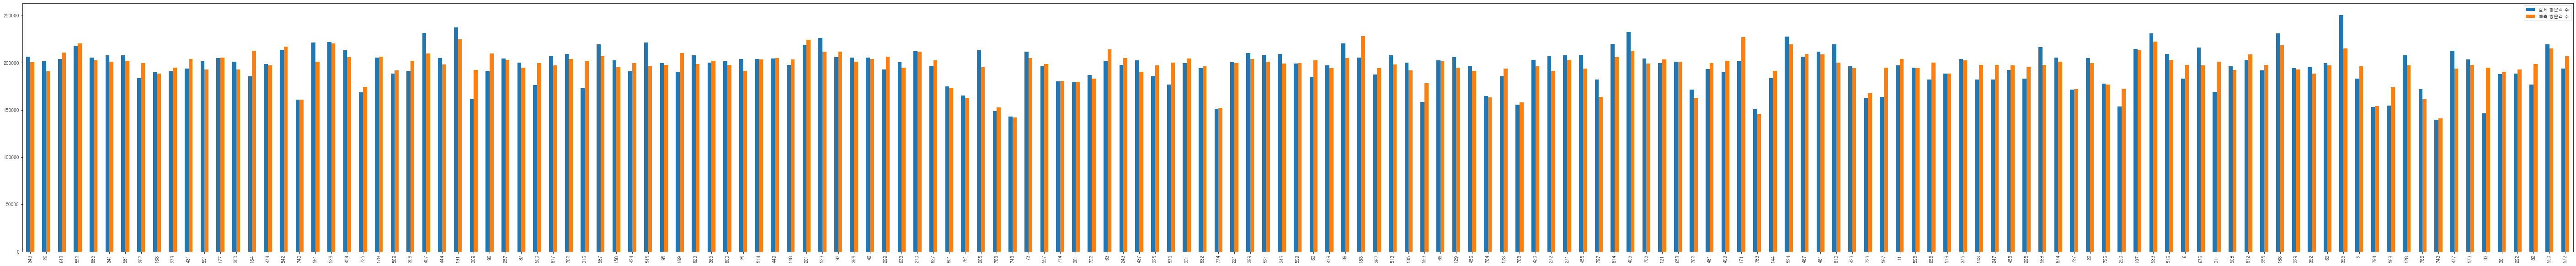

In [33]:
plt.rcParams["figure.figsize"] = (100,10)
y_compare.plot(y=['실제 방문객 수', '예측 방문객 수'], kind="bar")

<AxesSubplot:>

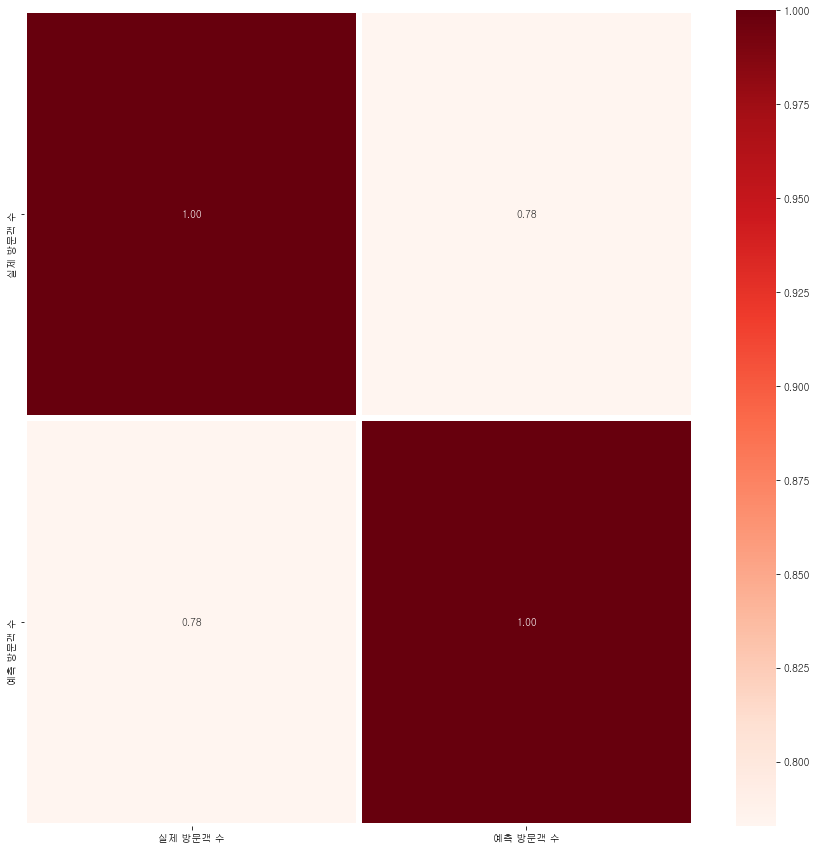

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(15,15))
sns.heatmap(data = y_compare.corr(), annot=True, 
fmt = '.2f', linewidths=5, cmap='Reds')